In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import sys, copy, emcee, corner

%matplotlib inline
%load_ext autoreload

sys.path.append('./ligbind/')
import ligbind as lb

In [2]:
lb.dilser()

array([  1.00000000e-03,   2.00000000e-03,   4.00000000e-03,
         8.00000000e-03,   1.60000000e-02,   3.20000000e-02,
         6.40000000e-02,   1.28000000e-01,   2.56000000e-01,
         5.12000000e-01,   1.02400000e+00,   2.04800000e+00,
         4.09600000e+00,   8.19200000e+00,   1.63840000e+01,
         3.27680000e+01,   6.55360000e+01,   1.31072000e+02])

In [3]:
parmset = np.array([4.5,5.8,0.65,540.])

In [8]:
dat = lb.WymSim(sets=100,parms=parmset,noise=0.05)

In [12]:
dat.meanset[1]

array([[ 0.00361559,  0.00743462,  0.0152872 ,  0.030828  ,  0.05681743,
         0.10647174,  0.20086565,  0.30908152,  0.48598897,  0.65884997,
         0.7469418 ,  0.87757925,  0.96053226,  0.98831858,  1.01118594,
         0.94627302,  0.96677798,  0.94882612],
       [ 0.00360972,  0.00736284,  0.01406966,  0.02785261,  0.05486371,
         0.10046908,  0.1741307 ,  0.29912491,  0.45674529,  0.5997407 ,
         0.777844  ,  0.86063076,  0.90623634,  0.98214029,  0.99805615,
         0.9826326 ,  0.97426596,  1.01802151],
       [ 0.00344439,  0.00689408,  0.01316229,  0.02651879,  0.05332117,
         0.09816229,  0.17135474,  0.29718729,  0.42462182,  0.6152278 ,
         0.73442895,  0.85779007,  0.91340766,  0.93904058,  0.98714307,
         1.00984839,  1.00872182,  0.99706894],
       [ 0.00330017,  0.0066636 ,  0.01332658,  0.02469875,  0.04976276,
         0.09595824,  0.16293146,  0.28901424,  0.39984734,  0.57110142,
         0.71739435,  0.87714917,  0.87074058,  0.912

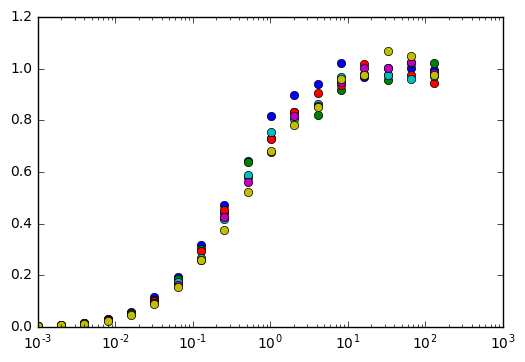

In [13]:
lb.semlog(dat.ligs,dat.meanset[0],'o')

In [18]:
#vary all Wym model parameters
#variance weighted by y-value (not y squared)
def lnlik4p(parms,rtot,data,ligs):
    datac = np.concatenate(data)
    modparms = parms
    rtots = rtot
    f = parms[-1]
    model = lb.models.wymfunc(modparms,ligs,rtots)
    invsig2 = 1.0/np.square(f * np.sqrt(model))
    return -0.5*(np.sum((datac-model)**2*invsig2 - np.log(invsig2)))

#uniform prior based on bounds
def lnpri4p(allfit,bounds):
    assert len(bounds) == len(allfit)
    if all([bounds[i][0] <= allfit[i] <= bounds[i][1] for i in range(len(bounds))]) is True:
        return 0.0
    else:
        return -np.inf
    
def lnprob4p(allfit,bounds,rtot,data,ligs):
    lp = lnpri4p(allfit,bounds)
    if not np.isfinite(lp):
        return -np.inf
    return lp + lnlik4p(allfit,rtot,data,ligs)

In [19]:
nll4p = lambda *args: -lnlik4p(*args)

In [81]:
guess = np.array([5.,5.,1.,467.,0.05])

In [82]:
nll4p(guess,dat.rtot,dat.meanset[0],dat.ligs)

-387.29181750903376

In [83]:
bnds4p = ((0.01, 100.),
                 (0.01, 100.),
                 (0.01, 10.),
                 (0.01, 10000.0),
                 (0.01, 0.1))

In [91]:
nll_res4p = sp.optimize.minimize(nll4p,guess,bounds=bnds4p,args=(dat.rtot,dat.meanset[0],dat.ligs))

In [89]:
nll_res4p.x

array([  4.55633119e+00,   5.71038912e+00,   5.88030746e-01,
         4.67000081e+02,   2.26412116e-02])

In [31]:
dat.ligs

array([[  1.00000000e-03,   2.00000000e-03,   4.00000000e-03,
          8.00000000e-03,   1.60000000e-02,   3.20000000e-02,
          6.40000000e-02,   1.28000000e-01,   2.56000000e-01,
          5.12000000e-01,   1.02400000e+00,   2.04800000e+00,
          4.09600000e+00,   8.19200000e+00,   1.63840000e+01,
          3.27680000e+01,   6.55360000e+01,   1.31072000e+02],
       [  1.00000000e-03,   2.00000000e-03,   4.00000000e-03,
          8.00000000e-03,   1.60000000e-02,   3.20000000e-02,
          6.40000000e-02,   1.28000000e-01,   2.56000000e-01,
          5.12000000e-01,   1.02400000e+00,   2.04800000e+00,
          4.09600000e+00,   8.19200000e+00,   1.63840000e+01,
          3.27680000e+01,   6.55360000e+01,   1.31072000e+02],
       [  1.00000000e-03,   2.00000000e-03,   4.00000000e-03,
          8.00000000e-03,   1.60000000e-02,   3.20000000e-02,
          6.40000000e-02,   1.28000000e-01,   2.56000000e-01,
          5.12000000e-01,   1.02400000e+00,   2.04800000e+00,
      

In [40]:
dat.parms

array([   4.5 ,    5.8 ,    0.65,  540.  ])

In [100]:
#vary all Wym model parameters
#variance weighted by y-value (not y squared)
def lnlik4pV1(parms,rtot,data,ligs):
    datac = np.concatenate(data)
    modparms = parms[:-1]
    rtots = rtot
    #f = parms[-1]
    model = lb.models.wymfunc(modparms,ligs,rtots)
    invsig2 = 1.0
    return -0.5*(np.sum((datac-model)**2*invsig2 - np.log(invsig2)))

In [101]:
nll4pV1 = lambda *args: -lnlik4pV1(*args)

In [102]:
nll4pV1(guess,dat.rtot,dat.meanset[0],dat.ligs)

0.043900045038868719

In [104]:
nll_res4p = sp.optimize.minimize(nll4pV1,guess,bounds=bnds4p,args=(dat.rtot,dat.meanset[0],dat.ligs))

In [105]:
nll_res4p.x

array([  4.37517327e+00,   5.96800978e+00,   6.31266100e-01,
         4.67001820e+02,   5.00000000e-02])

In [115]:
guess = np.array([5.,5.,1.,100,0.021])

In [125]:
nll_res4p = sp.optimize.minimize(nll4pV1,guess,bounds=bnds4p,method='SLSQP',args=(dat.rtot,dat.meanset[8],dat.ligs))

In [131]:
nll_res4p.fun

0.018217146903746154